# ***Data Mining - Concepts and Techniques***

## **Chapter 3: Data Preprocessing**

### **Data Preprocessing: An Overview**

**Data Quality _ Why preprocess the data?** $\rightarrow$ Measures for data quality: A multi-dimensional view
- **Accuracy** - correct or wrong, accurate or not
- **Completeness** - not recorded, unavailable,...
- **Consistency** - some modified but some not, dangling,...
- **Timeliness** - timely update?
- **Believability** - how trustable the data are correct?
- **Interpretability** - how easily the data can be understood?

**Major tasks in data preprocessing**

- **Data cleaning** - Fill in missing values, smooth noisy data, identify or remove outliers and resolve inconsistencies
- **Data integration** - Integration of multiple databases, data cubes or files
- **Data reduction** - Dimensionality reduction, numerosity reduction, data compression

- **Data transformation and data discretization** - Normalization, concept hierarchy generation

### **Data Cleaning**

Data in the real world is dirty $\rightarrow$ **lots of potentially incorrect data** $\rightarrow$ instrument faulty, human or computer error, transmission error


- **Incomplete** - lacking attribute values, lacking certain attributes of interest or containing only aggregate data  (Ex: *Occupation* = "" $\rightarrow$ missing data)
- **Noisy** - containing noise, errors or outliers (Ex: *Salary* = "-10" $\rightarrow$ an error)
- **Inconsistent** - containing discrepancies in codes or names
    - *Age* = "42", *Birthday* = "03/07/2010" $\rightarrow$ actually just 2025 - 2010 = 15 years old
    - Was rating "1, 2, 3" now rating "A, B, C" $\rightarrow$ inconsistent
    - Discrepancy between duplicate records 
- **Intentional** (e.g. disguised missing data)
    - Jan. 1 as everyone's birthday?

#### **Incomplete (missing) data**

**Incomplete** - lacking attribute values, lacking certain attributes of interest or containing only aggregate data  (Ex: *Occupation* = "" $\rightarrow$ missing data)

Data is not always available - Ex: many tuples have no recorded value for several attributes such as customer income in sales data

Missing data may be due to
- equipment malfunction $\rightarrow$ thiết bị bị trục trặc 
- inconsistent with other recorded data and thus deleted
- data not entered due to misunderstanding
- certain data may not be considered important at the time of entry
- not register history or changes of the data

Missing data may need to be inferred

**How to handle missing data?**

1. ***Ignore the tuple*** - usually done when class label is missing (when doing classification) - not effective when the $\%$ of missing values per attribute varies considerably (đáng kể)
2. ***Fill in missing value manually*** - tedious + infeasible ?
3. ***Fill in it automatically with***
    - **A global constant** - e.g. *unknown*, a new class?
    - **The attribute mean**  
    - **The attribute mean** for all samples belonging to the same class $\rightarrow$ smarter
    - **The most probable value** - inference-based such as *Bayesian formula* or *decision tree*


#### **Noisy data**

**Noisy** - containing noise, errors or outliers (Ex: *Salary* = "-10" $\rightarrow$ an error)

**Noise** - random error or variance in a measured variable

Incorrect attribute values (noise) may be due to
- faulty data collection instruments $\rightarrow$ công cụ thu thập dữ liệu bị lỗi
- data entry problems
- data transmission problems
- inconsistency in naming convention

**Other data problems which require data cleaning**
- duplicate records
- incomplete data
- inconsistent data

**How to handle noisy data?**

**Binning**
- First sort data and partition into (equal-frequency) bins
- Then one can **smooth by bin means**, **smooth by bin median**, **smooth by bin boundaries**, etc.

**Regression**
- Smooth by fitting the data into regression functions

**Clustering**
- Detect and remove outliers

**Combined computer and human inspection**
- Detect suspicious values and check by human (Ex: deal with possible outliers)


#### **Data Cleaning as a process**

**Data discrepancy detection**

- Use metadata (e.g., domain, range, dependency, distribution)
- Check field overloading
- Check uniqueness rule, consecutive rule and null rule
- Use commercial tools
    - **Data scrubbing** - use simple domain knowledge (e.g., postal code, spell-check) to detect errors and make corrections
    - **Data auditing** - by analyzing data to discover rules and relationship to detect violators (e.g., correlation and clustering to find outliers)


**Data migration and integration**

- **Data migration** tools  - allow transformations to be specified
- **ETL (Extraction/Transformation/Loading)** tools - allow users to specify transformations through a graphical user interface (GUI)

**Integration of the two processes**
- Iterative and interactive (e.g., **Potter's Wheels**)

### **Data Integration**

**Data integration** - combines data from multiple sources into a coherent store

**Schema integration** - (e.g., `A.cust-id` = `B.cust-#`) - integrate metadata from different sources

**Entity identification problem** - identify real world entities from multiple data sources (e.g., Bill Clinton = William Clinton)

**Detecting and resolving data value conflicts** 
- For the same real world entity, attribute values from different sources are different
- Possible reasons: different representations, different scales. e.g., metric vs British units

#### **Handling redundancy in data integration**

Redundant data occur often when integration of multiple databases

- *Object identification* - the same attribute or object may have different names in different databases
- *Derivable data* - one attribute may be a 'derived' attribute in another table

Redundant attributes may be able to be detected by **correlation analysis** and **covariance analysis**

Careful integration of the data from multiple sources may help **reduce**/**avoid** redundancies and inconsistencies and improve mining speed and quality

#### **Correlation Analysis (Nominal Data)**

**$\mathcal{X}^2$ (chi-square) test**

$$\mathcal{X}^2 = \sum{\frac{\left(  \operatorname{Observed} - \operatorname{Expected} \right)^2}{\operatorname{Expected}}}$$

The larger the $\mathcal{X}^2$ value, the more likely the variables are related

The cells that contribute the most to the $\mathcal{X}^2$ value are those **whose actual count is very different from the expected count**

Correlation does not imply **causality**
- **$\#$ of hospitals** and **$\#$ of car-theft** in a city are correlated $\rightarrow$ but both are causally linked to the third variable: **population**

**Chi-Square calculation: An example**

<center>

|     | **Play chess** | **Not play chess** | **Sum (row)** | 
| --- | --- | --- | --- | 
| **Like science fiction** | 250 (90) | 200 (360) | 450 | 
| **Not like science fiction**  | 50 (210) | 1000 (840) | 1050 | 
| **Sum (col)** | 300 | 1200 | 1500 |

</center>

$\mathcal{X}^2$ (chi-square) calculation (numbers in **parenthesis** are expected counts calculated based on the data distribution in the two categories)

$$\mathcal{X}^2 = \frac{(250 - 90)^2}{90} + \frac{(50-210)^2}{210} + \frac{(200-360)^2}{360} + \frac{(1000-840)^2}{840} = 507.93$$

It shows that `like_science_fiction` and `play_chess` are correlated in the groups

#### **Correlation Analysis (Numeric Data)**

Correlation coefficient (also called **Pearson's product moment coefficient**)

$$r_{A, B} = \frac{\sum^n_{i=1} (a_i - \bar{A})(b_i - \bar{B})}{{(n - 1)\sigma_A \sigma_B}} = \frac{\sum_{i=1}^n (a_i b_i) - n\bar{A}\bar{B}}{(n-1)\sigma_A \sigma_B}$$

where
- $n$ - the number of tuples
- $\bar{A}, \bar{B}$ - the mean of $A$ and $B$
- $\sigma_A, \sigma_B$ - the standard deviation of $A$ and $B$
- $\sum (a_i b_i)$ - the sum of the $AB$ cross-product

If 
- $r_{A,B} > 0$, $A$ and $B$ are positively correlated ($A$'s values increase as $B$'s) $\rightarrow$ the higher, the stronger correlation
- $r_{A,B} = 0$ - independent
- $r_{A,B} < 0$ - negatively correlated

**Visually evaluating correlation**

<center>

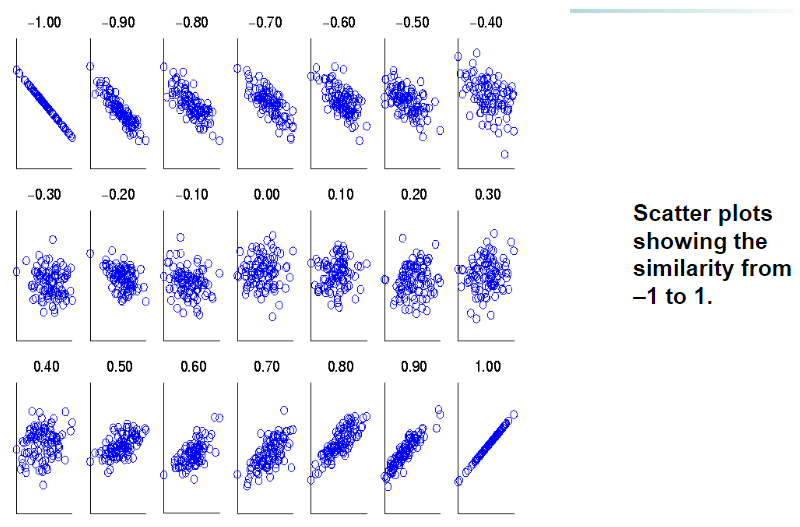

</center>

#### **Correlation (viewed as linear relationship)**

Correlation measures the linear relationship between objects

To compute correlation, we standardize data objects $A$ and $B$ and then take their dot product

1. $$a_k' = \frac{a_k - \operatorname{mean}(A)}{\operatorname{std}(A)}$$

1. $$b_k' = \frac{b_k - \operatorname{mean}(B)}{\operatorname{std}(B)}$$

2. $$\operatorname{correlation}(A, B) = A' \cdot B'$$

#### **Covariance (Numeric Data)**

Covariance is similar to correlation

$$\operatorname{Cov}(A, B) = E((A - \bar{A})(B - \bar{B})) = \frac{\sum^n_{i=1} (a_i - \bar{A})(b_i - \bar{B})}{n}$$

Correlation coefficient: 
$$r_{A,B} = \frac{\operatorname{Cov}(A, B)}{\sigma_A \sigma_B}$$

where
- $n$ - the number of tuples
- $\bar{A}, \bar{B}$ - the mean or **expected values** of $A$ and $B$
- $\sigma_A, \sigma_B$ - the standard deviation of $A$ and $B$


**Positive covariance** - If $\operatorname{Cov}_{A,B} > 0$ then $A$ and $B$ both tend to be larger than their mean or **expected values** 

**Negative covariance** - If $\operatorname{Cov}_{A,B} < 0$ then if $A$ is larger than its **expected value**, $B$ is likely to be smaller than its **expected value** and otherwise

**Independence** - $\operatorname{Cov}_{A,B} = 0$ but the converse (điều ngược lại) is not true
- Some pairs of random variables may have a covariance of 0 but are not independent. Only under some additional assumption (e.g., the data follow multivariate normal distribution) does a covariance of 0 imply independence.


**Co-Variance: An Example**

$$\operatorname{Cov}(A, B) = E((A - \bar{A})(B - \bar{B})) = \frac{\sum^n_{i=1} (a_i - \bar{A})(b_i - \bar{B})}{n}$$

It can be simplified in computation as 

$$\operatorname{Cov}(A, B) = E(A \cdot B) - \bar{A}\bar{B}$$

Suppose two stocks $A$ and $B$ have the following values in one week: **(2, 5), (3, 8), (5, 10), (4, 11), (6, 14)**

- $E(A) = \frac{2 + 3 + 5 + 4 + 6}{5} = \frac{20}{5} = 4$

- $E(B) = \frac{5 + 8 + 10 + 11 + 14}{5} = \frac{48}{5} = 9.6$

$\Rightarrow \operatorname{Cov}(A,B) = \frac{2 \times 5 + 3 \times 8 + 5 \times 10 + 4 \times 11 + 6 \times 14}{5} - 4 \times 9.6 = 4$

Thus, $A$ and $B$ rise together since $\operatorname{Cov}(A, B) > 0$

### **Data Reduction**

**Data reduction** - obtain a reduced representation of the dataset that is much smaller in volume but yet produces the same (or almost the same) analytic results

**Why data reduction**
$\rightarrow$ A database/data warehouse may store terabytes of data and the complex data analysis may take a very long time to run on the complete dataset

**Data reduction strategies** ---

**Dimensionality reduction** - e.g., remove unimportant attributes
- Wavelet transforms
- Principal Components Analysis (PCA)
- Feature subset selection, feature creation

**Numerosity reduction** - some simply call it: Data Reduction
- Regression and Log-Linear models
- Histograms, clustering, sampling
- Data cube aggregation

**Data compression**

#### **Data Reduction # 1: Dimensionality Reduction**


**Curse of dimensionality**
- When dimensionality increases, data becomes increasing sparse
- Density and distance between points - which is critical to clustering, outlier analysis - becomes less meaningful
- The possible combinations of subspaces will grow exponentially

**Dimensionality reduction**
- Avoid the curse of dimensionality
- Help eliminate irrelevant features and reduce noise
- Reduce time and space required in data mining
- Allow easier visualization

**Dimensionality reduction techniques**
- Wavelet transforms
- Principle Component Analysis (PCA)
- Supervised and nonlinear techniques (e.g., feature selection)

#### **Mapping data to a new space**

- **Fourier transform**
- **Wavelet transform**

<center>

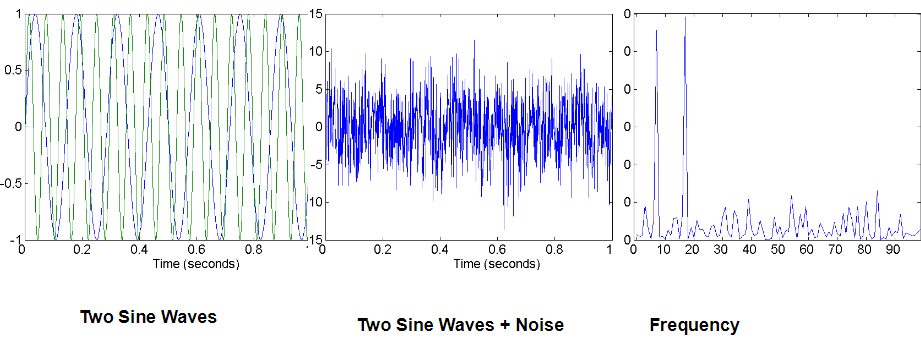

</center>

#### **What is Wavelet transform?**

Decomposes a signal into different frequency subbands - **Phân tách một tín hiệu vào các băng con có tần số khác nhau** - applicable to $n$-dimension signals

<center>

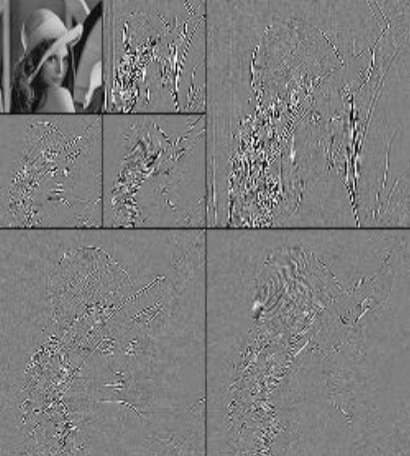

</center>

Data are transformed to preserve relative distance between objects at different levels of resolution (mức độ phân giải)

Allow natural clusters to become more distinguishable

Used for image compression

#### **Wavelet Transformation**

**Discrete wavelet transform (DWV)** for linear signal processing, multi-resolution analysis

Compressed approximation - store only a fraction of the strongest of the wavelet coefficients

Similar to **discrete Fourier transform (DFT)** but better lossy compression, localized in space

**Method**
- Length $L$ must an be integer power of 2 (padding with 0's when necessary)
- Each transform has 2 functions: *smoothing*, *difference*
- Applies to pairs of data, resulting in two set of data of length $\frac{L}{2}$
- Applies two functions recursively until reaches the desired length

#### **Wavelet Decomposition**

**Wavelets** - a math tool for space-efficient hierarchical decomposition of functions

Below is the example for a **wavelet transform**, specifically the ***Haar wavelet transform*** where a signal (or dataset) is decomposed into **average** and **detail coefficients** at different resolutions

#### **Step-by-Step calculation of the *Haar Wavelet transform***

The ***Haar wavelet transform*** works by:
1. **Averaging pairs of values** to get **a coarser resolution** (độ phân giải thô)
2. **Computing the detail coefficients** which capture the differences between **the original values** and **the averages** or capture the differences between levels $\rightarrow$ allow compression by setting small values to zero

$\Rightarrow$ **Compression**: many small **detail coefficients** can be replaced by 0's and only the **significant coefficients** are retained

---

Given $S = [2, 2, 0, 2, 3, 5, 4, 4]$ can be transformed to $\underset{\hat{}}{S} = [2^{3/4} ,  -1^{1/4}, \frac{1}{2}, 0, 0, -1, -1, 0]$


***Step 1***: Compute **averages** and **detail coefficients** for Resolution 4


Pair adjacent values and compute:

**Averages**

$$A_i = \frac{x_{2i} + x_{2i + 1}}{2}$$

**Detail Coefficients**

$$D_i = \frac{x_{2i} - x_{2i+1}}{2}$$

<center>

| **Pair** | **Average ($A$)** | **Detail coefficient ($D$)** |
| --- | --- | --- |
| (2, 2) | $\frac{2 + 2}{2}=2$ | $\frac{2 - 2}{2}=0$ | 
| (0, 2) | $\frac{0 + 2}{2}=1$ | $\frac{0 - 2}{2}=-1$ |
| (3, 5) | $\frac{3 + 5}{2}=4$ | $\frac{3 - 5}{2}=-1$ |
| (4, 4) | $\frac{4 + 4}{2}=4$ | $\frac{4 - 4}{2}=0$ |

</center>

Thus, after one step:
- **Averages** - [2, 1, 4, 4]
- **Detail coefficients** - [0, -1, -1, 0]


***Step 2***: Compute **averages** and **detail coefficients** for Resolution 2

Now, repeat the same process using the new averages [2, 1, 4, 4]

<center>

| **Pair** | **Average ($A$)** | **Detail coefficient ($D$)** |
| --- | --- | --- |
| (2, 1) | $\frac{2 + 1}{2}=\frac{3}{2}$ | $\frac{2 - 1}{2}=\frac{1}{2}$ | 
| (4, 4) | $\frac{4 + 4}{2}=4$ | $\frac{4 - 4}{2}=0$ |

</center>

Thus, after one step:
- **Averages** - [$\frac{3}{2}$, 4]
- **Detail coefficients** - [$\frac{1}{2}$, 0]

***Step 3***: Compute **averages** and **detail coefficients** for Resolution 1

One final step using [$\frac{3}{2}$, 4]

<center>

| **Pair** | **Average ($A$)** | **Detail coefficient ($D$)** |
| --- | --- | --- |
| ($\frac{3}{2}$, 4) | $\frac{\frac{3}{2} + 4}{2}=\frac{11}{4}$ | $\frac{\frac{3}{2} - 4}{2}=-\frac{5}{4}$ | 

</center>

Thus, the final step gives:
- **Averages**: $\frac{11}{4}$ which is often written as $2^{3/4}$ for **wavelet-style notation**
- **Detail coefficients**: $\frac{-5}{4}$ which may be written as $-1^{1/4}$


<center>

| **Resolution** | **Averages** | **Detail Coefficients** |
| --- | --- | --- |
| 8 | [2, 2, 0, 2, 3, 5, 4, 4] | |
| 4 | [2, 1, 4, 4] | [0, -1, -1, 0] |
| 2 | [ $1^{1/2}$, 4] | [ $\frac{1}{2}$, 0] |
| 1 | [ $2^{3/4}$ ] | [ $-1^{1/4}$ ]

</center>


#### **Haar Wavelet Coefficients**

<center>

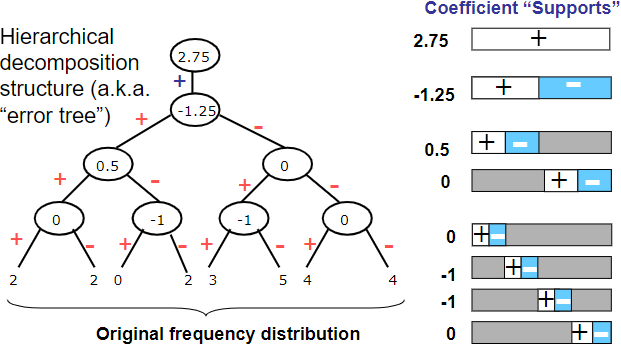

</center>

#### **Why wavelet transform?**

Use *hat-shape* filters
- Emphasize region where points cluster
- Suppress weaker information in their boundaries

Effective removal of outliers
- Insensitive to noise, input order

Multi-resolution
- Detect arbitrary shaped clusters at different scales

Efficient
- Complexity O(N)

Only applicable to low dimensional data

#### **Principal Component Analysis (PCA)**

**PCA** is a technique used in **dimensionality reduction** $\rightarrow$ take high-dimensional data and project it into a lower-dimensional space while keeping as much of the original variation (information) as possible or find a projection that captures the largest amount of variation (information) in data

Instead of keeping the original axes, **PCA** finds new axes *(principal components)* that maximize the spread (variance) of the data.

The original data are projected onto a much smaller space $\rightarrow$ resulting in dimensionality reduction. We find the eigenvectors of the covariance matrix and these eigenvectors define the new space

#### **How PCA works**

Given $N$ data vectors from $n$-dimensions, find $k \geq n$ orthogonal vectors (principle components) that can be best used to represent data

1. **Normalize input data** - Center the data (subtract the mean from each column) to ensure all variables have a mean of 0 $\rightarrow$ this removes bias due to different scales

2. **Compute the covariance matrix** - The **covariance matrix** means how variables are correlated. If two variables have high covariance, they provide redundant information

3. **Compute eigenvectors and eigenvalues** 
- The eigenvectors define new axes (principal components)
- The eigenvalues indicate how much variance each eigenvector captures

4. **Choose the top $k$ principle components**
- Sort the eigenvectors by eigenvalues (variance explained) and pick the top $k$ eigenvectors.

5. **Transform the data**
- Project the original data onto the new **lower-dimensional space**

[
- Normalize input data: Each attribute falls within the same range
- Compute $k$ orthonormal (unit) vectors, i.e., *principle components*
- Each input data (vector) is a linear combination of the $k$ principle component vectors
- The principle components are sorted in order of decreasing "significance" or strength
- Since the components are sorted, the size of the data can be reduced by eliminating the weak components, i.e., those with low variance (i.e., using the strongest principle components, it is possible to reconstruct a good approximation of the original data)

]

Work for numeric data only


#### **Example _ PCA on a 2D dataset**

Given dataset

<center>

| $x_1$ | $x_2$ |
| --- | --- | 
| 2.5 | 2.4 | 
| 0.5 | 0.7 |
| 2.2 | 2.9 |
| 1.9 | 2.2 |
| 3.1 | 3.0 |
| 2.3 | 2.7 |
| 2.0 | 1.6 |
| 1.0 | 1.1 |
| 1.5 | 1.6 |
| 1.1 | 0.9 |

</center>

**Step 1. Compute the mean**

Mean of $x_1$

$$\mu_{x_1} = \frac{1}{10} \sum{x_1} = \frac{(2.5 + 0.5 + 2.2 + ... + 1.1)}{10} = 1.81$$

Mean of $x_2$

$$\mu_{x_2} = \frac{1}{10} \sum{x_2} = \frac{(2.4 + 0.7 + 2.9 + ... + 0.9)}{10} = 1.91$$

**Step 2. Compute the covariance matrix**

First, subtract the mean from each value (normalize input data)

$$X = \left[ \begin{matrix} 2.5 - 1.81 & 2.4 - 1.91 \\ 0.5 - 1.81 & 0.7 - 1.91 \\ ... & ... \   \end{matrix} \right]$$

Then compute the covariance matrix on the normalized input data 

$$\sum = \left[ \begin{matrix}  \operatorname{Var}(x_1) & \operatorname{Cov}(x_1, x_2) \\ \operatorname{Cov}(x_1, x_2) &  \operatorname{Var}(x_2) \end{matrix}  \right]$$

After calculation

$$\sum = \left[ \begin{matrix}  0.616 & 0.615 \\ 0.615 &  0.716 \end{matrix}  \right]$$

**Step 3. Compute eigenvectors and eigenvalues**

Solving for eigenvalues

$$\lambda_1 = 1.284, \quad \lambda_2 = 0.049$$

Eigenvectors

$$v_1 = \left[ \begin{matrix} 0.677 \\ 0.736 \end{matrix} \right], \quad v_2 = \left[  \begin{matrix} -0.736 \\ 0.677  \end{matrix} \right]$$

Since $\lambda_1 > lambda_2$, the first eigenvector is the most important

**Step 4. Transform the data**

Project the original data onto the first eigenvector

$$Z = Xv_1$$

$\Rightarrow$ This reduces the 2D dataset to 1D while keeping most of the information / important direction

$\Rightarrow$ The first principle component captures most of the variance

$\Rightarrow$ PCA is useful in compression, noise reduction and visualization

#### **Example _ PCA on a 3D dataset**

Given **data** in **3D** (with three variables/features), **PCA** finds **three eigenvectors** but we can choose the top **one** or **two principle components** to reduce the data to **2D** or **1D**
1. From 3D to 2D: Keep the top two principal components and project the data onto a plane
2. From 3D to 1D: Keep only the most significant principal component and project the data onto a line

**Step-by-Step PCA in 3D**

The given **3D dataset** with three variables $x_1$, $x_2$, $x_3$

<center>

| $x_1$ | $x_2$ | $x_3$ |
| --- | --- | --- |
| 2.5 | 2.4 | 1.5 |
| 0.5 | 0.7 | 2.1 |
| 2.2 | 2.9	| 1.9 |
| 1.9 | 2.2	| 1.7 |
| 3.1 | 3.0 | 2.3 |
| 2.3 | 2.7 | 1.8 |
| 2.0 | 1.6	| 1.4 |
| 1.0 | 1.1	| 2.0 |
| 1.5 | 1.6	| 1.6 |
| 1.1 | 0.9	| 1.9 |

</center>

**Step 1: Center the data (subtract the mean)**

Compute the mean for each column:

$$\mu_{x_1} = \frac{1}{10} \sum x_1 \quad \mu_{x_2} = \frac{1}{10} \sum x_2 \quad \mu_{x_3} = \frac{1}{10} \sum x_3 $$

Subtract these means from each column to **center the data**

**Step 2: Compute the covariance matrix**

$$\sum = \left[ \begin{matrix}  \operatorname{Var}(x_1) & \operatorname{Cov}(x_1, x_2) & \operatorname{Cov}(x_1, x_3) \\ \operatorname{Cov}(x_1, x_2) &  \operatorname{Var}(x_2) & \operatorname{Cov}(x_2, x_3) \\  \operatorname{Cov}(x_3, x_1) & \operatorname{Cov}(x_3, x_2) & \operatorname{Var}(x_3) \end{matrix}  \right]$$

Each term is computed as:

$$\operatorname{Cov}(x_i, x_j) = \frac{1}{N}\sum(x_i - \mu_{x_i})(x_j - \mu_{x_j})$$

Let’s assume the computed covariance matrix is

$$\sum = \left[ \begin{matrix}  0.62 & 0.58 & 0.45 \\ 0.58 &  0.71 & 0.55 \\ 0.45 & 0.55 & 0.60  \end{matrix}  \right]$$

**Step 3: Compute eigenvectors and eigenvalues**

Solve for **eigenvalues** $\lambda$ and eigenvectors $v$

$$\det \left(\sum - \lambda I \right) = 0$$

Let's assume the computed **eigenvalues** are

$$\lambda_1 = 1.7, \quad \lambda_2 = 0.5, \quad \lambda_3 = 0.1$$

Corresponding **eigenvectors**

$$v_1 = \left[ \begin{matrix}  0.58 \\ 0.57 \\ 0.57 \end{matrix} \right], \quad v_2 = \left[ \begin{matrix}  -0.40 \\ 0.81 \\ -0.42 \end{matrix} \right], \quad v_3 = \left[ \begin{matrix}  0.71 \\ -0.15 \\ -0.69 \end{matrix} \right]$$

**Step 4: Choose the top principle components**

$v_1$  (largest eigenvalue) captures most variance 

$v_2$ (second largest eigenvalue) captures the next most variance

$v_3$ (smallest eigenvalue) captures the least variance

$\Rightarrow$ To reduce **3D** to **2D**, keep only the first two eigenvectors $v_1$ and $v_2$ and **discard** $v_3$

**Step 5: Transform the data**

Project the original **centered data matrix** $X$ onto the **new basis** (**eigenvectors** $v_1$ and $v_2$)

$$Z = XV$$

where $V$ is a matrix containing the first **two eigenvectors**

$$Z = \left[ \begin{matrix} 2.5 & 2.5 & 1.5 \\ 0.5 & 0.7 & 2.1 \\ ... & ... & ...   \end{matrix}  \right] \left[  \begin{matrix} 0.58 & -0.40 \\ 0.57 & 0.81 \\ 0.57 & -0.42 \end{matrix}    \right] $$

This gives a **2D representation** of the original **3D dataset**

#### **Visualizing PCA on a 3D Dataset**

- The **original data** is in **3D** space
- **PCA** finds the plane where most of the variance occurs
- **Project the data onto that plane** reducing it to **2D**

Example _ Imagine a cloud of points in 3D place. If the data mostly varies along two directions (but not much in the third), **PCA flattens the data onto a 2D plane** $\rightarrow$ keeping the most of the information while removing redundancy

In [ ]:
import numpy as np

def pca(X, k):
    """
    Perform Principal Component Analysis (PCA) on dataset X.
    :param X: Input data matrix (num_samples x num_features)
    :param k: Number of principal components to keep
    :return: Transformed data (num_samples x k), top k eigenvectors
    """
    # Step 1: Center the data (subtract mean)
    X_meaned = X - np.mean(X, axis=0)
    
    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(X_meaned, rowvar=False)
    
    # Step 3: Compute eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Step 4: Sort eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigenvectors = eigenvectors[:, sorted_indices[:k]]
    
    # Step 5: Transform the data onto the new basis
    X_reduced = np.dot(X_meaned, top_eigenvectors)
    
    return X_reduced, top_eigenvectors

# Example usage
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

X_pca, components = pca(X, k=1)
print("Reduced Data:")
print(X_pca)
print("Principal Components:")
print(components)

In [18]:
import numpy as np
from sklearn.decomposition import PCA

def pca(X, k):
    """
    Perform Principal Component Analysis (PCA) using sklearn.
    :param X: Input data matrix (num_samples x num_features)
    :param k: Number of principal components to keep
    :return: Transformed data (num_samples x k), top k principal components
    """
    pca_model = PCA(n_components=k)
    X_reduced = pca_model.fit_transform(X)
    
    return X_reduced, pca_model.components_

# Example usage
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

X_pca, components = pca(X, k=1)
print("Reduced Data:")
print(X_pca)
print("Principal Components:")
print(components)


Reduced Data:
[[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]
Principal Components:
[[-0.6778734  -0.73517866]]


#### **Attribute Subset Selection**

**ASS** is another way to reduce dimensionality of data

**Why is it needed?**

When working with a dataset, we often have many attributes (features) but not all of them are useful. Removing redundant and irrelevant attributes helps:
- Improve model accuracy
- Reduce overfitting
- Speed up computations
- Enhance model interpretability


**Types of Attributes**

**Redundant attributes** provide duplicate information and duplicate much or all of the information contained in one or more other attributes
- E.g., have `total_price` and `price_per_item` with `quantity`, one of them can be removed

**Irrelevant attributes** have no predictive power and contain no information that is useful for the data mining task at hand
- E.g., student'ID is often irrelevant to the task of predicting students' GPA

#### **Heuristic Search in Attribute Selection**

Since there are $2^d$ possible subsets of $d$ attributes, searching all possible combinations is impractical. Instead, use **heuristic search**

Typical heuristic attribute selection methods:

1 _ **Best single attribute selection**
- Assumes attributes are **independent**
- Selects the **single best attribute** based on a significance test (e.g., *chi-square test*, *mutual information*)

**Algorithm**
1. Compute the **significance score** (e.g., correlation, chi-square) for each attribute with the target variable
2. Select the attribute with the highest score

**Example**: Given attributes {`age`, `income`, `education`} to predict `loan_approval`:

1. Compute correlation scores:
- `age`: 0.3
- `income`: **0.8 (highest)**
- `education`: 0.6

2. Select `income` as the best attribute


2 _ **Step-wise feature selection** 

**Forward Selection (Step-wise Addition)** - start with **an empty set** and **add the best feature one by one**

**Algorithm**
1. Start with an empty feature set
2. Add the attribute that improves model performance the most
3. Repeat until adding a new feature **does not improve** performance

**Example**
1. Start `{}` (empty set)
2. Add `income` $\rightarrow$ `{income}`
3. Add `education` (if it improves performance) $\rightarrow$ `{income, education}`
4. Stop when adding `age` does not help :>

**Backward Elimination (Step-wise Removal)** - start with **all** attributes and **remove the worst one** at each step

**Algorithm**
1. Start with all attributes
2. Remove the least useful attribute (lowest contribution to performance)
3. Repeat until removal degrades performance

**Example**
1. Start `{age, income, education}`
2. Remove `age` $\rightarrow$ `{income, education}`
3. Remove `education` (if performance is still good) $\rightarrow$ `{income}`
4. Stop if removing further degrades performance

3 _ **Combined Selection and Elimination** - A mix of **forward selection** and **backward elimination**

**Algorithm**
1. Start with an empty set
2. Add the best feature
3. Check if any existing features can be removed without affecting performance
4. Repeat steps 2-3 until the best subset is found

**Example**
1. Start `{}` (empty set)
2. Add `income` $\rightarrow$ `{income}`
3. Add `education` $\rightarrow$ `{income, education}`
4. Remove `income` if `education` alone is enough


4 _ **Optimal Branch and Bound** - uses backtracking to prune the search space which is more efficient than exhaustive search

**Algorithm**
1. Define a **branching rule** (e.g., divide features into subsets)
2. Use a **bounding function** to estimate the best possible outcome for each subset
3. If a subset can not outperform the best known result, **prune it**
4. Recursively explore better subsets

**Example**
1. Consider `{age, income, education}`
2. Compute bounds on subsets `{income, education}`, `{age, education}`, `{income, age}`
3. Discard subsets unlikely to the best
4. Continue refining until the **optimal subset** is found

**Summary of Methods**

| **Method** | **Approach** | **Pros** | **Cons** | 
| --- | --- | --- | --- |
| **Best Single Attribute** | Pick the best one	| Simple, fast | Ignores interactions |
| **Step-wise Forward Selection** | Add best one at a time | Finds useful sets | Might miss best subset |
| **Step-wise Backward Elimination** | Remove worst one at a time | Starts with full info |	Can remove useful features |
| **Combined Selection & Elimination** | Mix of add/remove | More flexible | More complex |
| **Branch and Bound** | Prunes search space | Optimal subset | Requires good bounds |

In [19]:
import numpy as np
import itertools

# Sample dataset (X: features, y: target)
X = np.array([
    [25, 50000, 16],
    [45, 80000, 18],
    [35, 60000, 14],
    [50, 90000, 20],
    [23, 40000, 12]
])
y = np.array([1, 1, 0, 1, 0])  # Binary target

# Feature names
features = ["Age", "Income", "Education"]

def correlation(X, y):
    """Compute absolute correlation between each feature and target"""
    correlations = np.abs(np.corrcoef(X.T, y)[-1, :-1]) #
    return correlations

# 1. Best Single Attribute Selection
best_single_index = np.argmax(correlation(X, y))
print(f"Best single attribute: {features[best_single_index]}")

# 2. Step-wise Forward Selection
def forward_selection(X, y, features):
    selected = []
    remaining = list(range(X.shape[1]))
    best_score = 0
    while remaining:
        scores = {}
        for i in remaining:
            subset = selected + [i]
            score = np.mean(correlation(X[:, subset], y))  # Heuristic: mean correlation
            scores[i] = score
        best_feature = max(scores, key=scores.get)
        if scores[best_feature] > best_score:
            best_score = scores[best_feature]
            selected.append(best_feature)
            remaining.remove(best_feature)
        else:
            break
    return [features[i] for i in selected]

print("Step-wise Forward Selection:", forward_selection(X, y, features))

# 3. Step-wise Backward Elimination
def backward_elimination(X, y, features):
    selected = list(range(X.shape[1]))
    best_score = np.mean(correlation(X, y))
    while len(selected) > 1:
        scores = {}
        for i in selected:
            subset = [j for j in selected if j != i]
            score = np.mean(correlation(X[:, subset], y))
            scores[i] = score
        worst_feature = min(scores, key=scores.get)
        if scores[worst_feature] >= best_score:
            best_score = scores[worst_feature]
            selected.remove(worst_feature)
        else:
            break
    return [features[i] for i in selected]

print("Step-wise Backward Elimination:", backward_elimination(X, y, features))

# 4. Optimal Branch and Bound (Simple Exhaustive Search for Small d)
def branch_and_bound(X, y, features):
    best_subset = []
    best_score = 0
    for r in range(1, len(features) + 1):
        for subset in itertools.combinations(range(len(features)), r):
            score = np.mean(correlation(X[:, subset], y))
            if score > best_score:
                best_score = score
                best_subset = subset
    return [features[i] for i in best_subset]

print("Optimal Branch and Bound:", branch_and_bound(X, y, features))

Best single attribute: Education
Step-wise Forward Selection: ['Education']
Step-wise Backward Elimination: ['Age', 'Income', 'Education']
Optimal Branch and Bound: ['Education']


#### **Attribute Creation (Feature Generation)**

Feature generation is a crucial step in data preprocessing that enhances model performance by creating informative features. 

It helps in improving interpretability, reducing noise and sometimes even reducing dimensionality.

The three general methodologies for feature generation:

**1 _ Attribute Extraction (Feature Extraction)**

This method involves extracting relevant features from raw data using domain knowledge. It is highly domain-specific

**Examples**
1. Text Data $\rightarrow$ Extract **TF-IDF**, **n-grams** or **embeddings**
2. Image Data $\rightarrow$ Extract edges, texture, color histograms or deep learning-based features
3. Time Series Data $\rightarrow$ Extract trends, seasonality, Fourier or Wavelet features

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["This is a sample document.",  
          "This document is another example.",  
          "Yet another sample of text data."]  

vectorizer = TfidfVectorizer()  
X = vectorizer.fit_transform(corpus)  

print("Feature Names:", vectorizer.get_feature_names_out())  
print("TF-IDF Matrix:\n", X.toarray())  

Feature Names: ['another' 'data' 'document' 'example' 'is' 'of' 'sample' 'text' 'this'
 'yet']
TF-IDF Matrix:
 [[0.         0.         0.5        0.         0.5        0.
  0.5        0.         0.5        0.        ]
 [0.41779577 0.         0.41779577 0.54935123 0.41779577 0.
  0.         0.         0.41779577 0.        ]
 [0.3349067  0.44036207 0.         0.         0.         0.44036207
  0.3349067  0.44036207 0.         0.44036207]]


**Algorithm**
1. Create a **TF-IDF Vectorizer**
2. Fit the vectorizer on a **corpus of text**
3. Transform the text into a **TF-IDF matrix**
4. Extract **important words** based on TF-IDF score

**2 _ Mapping data to a new space (Feature Transformation)**

Transforms the feature space into a different representation. This is useful for data compression, noise reduction and improving model efficiency

**Example**
1. **Fourier Transform** $\rightarrow$ Converts time-domain signals to frequency-domain.

2. **Wavelet Transform** $\rightarrow$ Used in signal processing for decomposing signals.

3. **Manifold Learning** (e.g., t-SNE, UMAP, PCA) $\rightarrow$ Projects high-dimensional data into a lower-dimensional space.

**3 _ Attribute Construction (Feature Engineering)**

New features are created from existing ones by combining or transforming them.

**Example**
1. **Combining features** $\rightarrow$ Creating interaction terms (e.g., Age $\times$ Salary)
2. **Data Discretization** $\rightarrow$ Binning continuous features into categorical ones
3. **Polynomial Features** $\rightarrow$ Adding squared or cubic terms of existing features
4. **Feature Splitting** $\rightarrow$ Extracting day, month, year from a date column

**Algorithm (Feature Engineering on numerical data)**

In [21]:
import pandas as pd  
from sklearn.preprocessing import PolynomialFeatures  

data = pd.DataFrame({'Age': [25, 30, 35], 'Salary': [50000, 60000, 70000]})  
poly = PolynomialFeatures(degree=2, interaction_only=True)  
X_poly = poly.fit_transform(data)  

print("Transformed Features:\n", X_poly)  

Transformed Features:
 [[1.00e+00 2.50e+01 5.00e+04 1.25e+06]
 [1.00e+00 3.00e+01 6.00e+04 1.80e+06]
 [1.00e+00 3.50e+01 7.00e+04 2.45e+06]]


**Algorithm**
1. **Create interaction features** using `PolynomialFeatures`
2. **Transform data** to include interaction terms
3. **Use the generated features** in modeling

**Feature Generation** using the **Titanic dataset** which is commonly used for classification tasks (e.g., predicting survival). Apply

1. **Feature Extraction** (Extracting titles from passenger names)

2. **Feature Transformation** (Using PCA for dimensionality reduction)

3. **Feature Engineering** (Creating interaction terms and binning ages)

In [22]:
import pandas as pd  

# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Feature Extraction (Extracting titles from names)**

In [23]:
df["Title"] = df["Name"].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with "Other"
df["Title"] = df["Title"].replace(["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Other")

print(df[["Name", "Title"]].head())


                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


$\Rightarrow$  New Feature: **`Title`** (e.g., Mr, Mrs, Miss, Other)

**Feature Transformation (PCA on numerical features)**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical columns and fill missing values
num_features = ["Age", "Fare", "Pclass", "SibSp", "Parch"]
df[num_features] = df[num_features].fillna(df[num_features].median())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_features])

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA features to dataset
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

print(df[["PCA1", "PCA2"]].head())


$\Rightarrow$ New Features: **`PCA1`**, **`PCA2`** (dimensionality-reduced numerical features)

**Feature Engineering (Creating interaction & binning `Age`)**

In [24]:
# Feature Engineering: Family Size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Feature Engineering: Binning Age
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 50, 80], labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"])

print(df[["Age", "FamilySize", "AgeGroup"]].head())

    Age  FamilySize    AgeGroup
0  22.0           2  YoungAdult
1  38.0           2       Adult
2  26.0           1  YoungAdult
3  35.0           2  YoungAdult
4  35.0           1  YoungAdult


$\Rightarrow$ New Features: **`FamilySize`**, **`AgeGroup`** (categorical)

#### **Data Reduction # 2: Numerosity Reduction**

Reduce data volume by choosing alternative, *smaller forms* of dat representation

**Parametric methods** (e.g., *regression*)
- Assume the data fits some model, estimate model parameters, store only the parameters and discard the data (except possible outliers)
- Ex: Log-linear models obtains value at a point in $m-D$ space as the product on appropriate marginal subspaces

**Non-parametric mehthods**
- Do not assume models
- Major families: *histograms*, *clustering*, *sampling*, ...

#### **Parametric Data Reduction: Regression and Log-Linear Models**

**Linear regression**
- Data modeled to fit a straight line
- Often uses the least-square method to fit the line

**Multiple regression**
- Allows a response variable Y to be modeled as a linear function of multidimensional feature vector

**Log-linear model**
- Approximates discrete multidimensional probability distributions

#### **Regression Analysis**

**Regression Analysis** is a collective name for techniques for the modeling and analysis of numerical data consisting of values of a **dependent variable** (also called **response variable** or **measurement**) and one or more **independent variables** (also called **explanatory variables** or **predictors**)

The parameters are estimated so as to give a **best fit** of the data

Most commonly the **best fit** is evaluated by using the **least squares method** but other criteria have also been used

Used for prediction (including forecasting of time-series data), inference, hypothesis testing and modeling of causal relationships

<center>

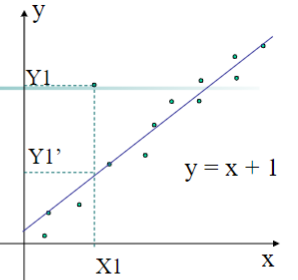

</center>

#### **Regression Analysis and Log-Linear Models**

**Linear regression** - $Y = wX + b$

- Two regression coefficients, $w$ and $b$ specify the line and are to be estimated by using the data at hand
-Using the least squares criterion to the known values of $Y_1$, $Y_2$,..., $X_1$, $X_2$,...

**Multiple regression** - $Y = b_0 + b_1X_1 + b_2X_2$
- Many nonlinear functions can be transformed into the above

**Log-linear models**
- Approximate discrete multidimensional probability distributions
- Estimate the probability of each point (tuple) in a multidimensional space for a set of discretized attributes based on a smaller subset of dimensional combinations
- Useful for dimensionality reduction and data smoothing

#### **Histogram Analysis**

- Divide data into buckets and store average (sum) for each bucket

- Partitioning rules:
    - **Equal-width** - equal bucket range
    - **Equal-frequency** (or equal-depth)

#### **Clustering**

- Partition dataset into clusters based on similarity and store cluster representation (e.g., centroid and diameter only)

- Can be very effective if data is clustered but not if data is `smeared`

- Can have hierarchical clustering and be stored in multidimensional index tree structures

- There are many choices of clustering definitions and clustering algorithms

#### **Sampling**

- Sampling: obtaining a small sample $s$ to represent the whole dataset $N$

- Allow a **mining algorithm** to run in complexity that is potentially sub-linear to the size of the data

- Key principle: Choose a **representative** subset of the data
    - Simple random sampling may have very poor performance in the presence of skew
    - Develop adaptive sampling methods e.g., stratified sampling

#### **Types of Sampling**

**Simple random sampling**
- There is an equal probability of selecting any particular item

**Sampling without replacement**
- Once an object is selected, it is removed from the population

**Sampling with replacement**
- A selected object is not removed from the population

**Stratified sampling**
- Partition the dataset and draw samples from each partition (proportionally, i.e., approximately the same percentage of the data)
- Used in conjunction with skewed data

#### **Data Cube Aggregation**

The lowest level of a data cube (base cuboid)
- The aggregated data for an individual entity of interest
- E.g., a customer in a phone calling data warehouse

Multiple levels of aggregation in data cubes
- Further reduce the size of data to deal with

Reference appropriate levels
- Use the smallest representation which is enough to 
solve the task

Queries regarding aggregated information should be answered using data cube, when possible


#### **Data Reduction 3: Data Compression**

*String compression*
- There are extensive theories and well-tuned algorithms
- Typically lossless, but only limited manipulation is possible without expansion

*Audio/video compression*
- Typically lossy compression, with progressive refinement
- Sometimes small fragments of signal can be reconstructed without reconstructing the whole

*Time sequence is not audio*
- Typically short and vary slowly with time

Dimensionality and numerosity reduction may also be considered as forms of data compression


### **Data Transformation and Data Discretization**

#### **Data Transformation**

A function that maps the entire set of values of a given attribute to be a new set of replacement values s.t. each old value can be identified with one of the new values

**Methods**
- **Smoothing** - Remove noise from data

- **Attribute/feature construction**
    - New attributes constructed from the given ones

- Aggregation: Summarization, data cube construction

- Normalization: Scaled to fall within a smaller, specified range
    - min-max normalization
    - z-score normalization
    - normalization by decimal scaling

- Discretization: Concept hierarchy climbing

#### **Normalization**

**Min-Max normalization** - to [$\space \operatorname{new\_min_A}, \operatorname{new\_max_A} \space$]

$$v' = \frac{v - \min_A}{\max_A - \min_A}(\operatorname{new\_max}_A - \operatorname{new\_min}_A) + \operatorname{new\_min}_A$$

Ex - Let income range $12000 to $98000 normalized to [$0.0, 1.0$]. Then $73000 is mapped to 

$$\frac{73000 - 12000}{98000 - 12000}(1 - 0) + 0 = 0.716$$

**Z-score normalization** (mean and std)

$$v' = \frac{v - \mu_A}{\sigma_A}$$

Ex - Let $\mu = 54000$, $\sigma = 16000$ then $\frac{73000 - 54000}{16000} = 1.225$

**Normalization by decimal scaling**

$$v' = \frac{v}{10^j}$$

where

- $j$ is the smallest integer such that $\max(|v'|) < 1$

**Discretization**

Three types of attributes
- **Nominal** - values from an unordered set, e.g., color, profession
- **Ordinal** - values from an ordered set, e.g., military or academic 
rank
- **Numeric** - real numbers, e.g., integer or real numbers

**Discretization** divides the range of a continuous attribute into intervals
- Interval labels can then be used to replace actual data values
- Reduce data size by discretization
- Supervised vs Unsupervised
- Split (top-down) vs merge (bottom-up)
- Discretization can be performed recursively on an attribute
- Prepare for further analysis, e.g., classification

**Data Discretization Methods**
 
Typical methods: All the methods can be applied recursively
- Binning $\rightarrow$ top-down split, unsupervised
- Histogram analysis $\rightarrow$ top-down split, unsupervised
- Clustering analysis $\rightarrow$ unsupervised, top-down split or bottom-up merge
- Decision-tree analysis $\rightarrow$ supervised, top-down split
- Correlation (e.g., $\chi^2$) analysis $\rightarrow$ unsupervised, bottom-up merge

---

**Simple Discretization: Binning**

**Equal-width (distance) partitioning**

- Divides the range into $N$ intervals of equal size: uniform grid
- If $A$ and $B$ are the lowest and highest values of the attribute, the width of intervals will be $W = \frac{B - A}{N}$
- The most straightforward but outliers may dominate presentation
- Skewed data is not handled well

**Equal-depth (frequency) partitioning**
- Divides the range into $N$ intervals, each containing approximately same number of samples
- Good data scaling
- Managing categorical attributes can be tricky

----

**Binning methods for Data Smoothing**

Sorted data for price (in dollars): 4, 8, 9, 15, 21, 21, 24, 25, 26, 28, 29, 34

1 _ Partition into equal-frequency (equal-depth) bins:
- Bin 1: 4, 8, 9, 15
- Bin 2: 21, 21, 24, 25
- Bin 3: 26, 28, 29, 34

2 _ Smoothing by **bin means**
- Bin 1: 9, 9, 9, 9
- Bin 2: 23, 23, 23, 23
- Bin 3: 29, 29, 29, 29

3 _ Smoothing by **bin boundaries**
- Bin 1: 4, 4, 4, 15
- Bin 2: 21, 21, 25, 25
- Bin 3: 26, 26, 26 , 34

--- 

**Discretization Without Using Class Labels (Binning vs. Clustering)**

<center>

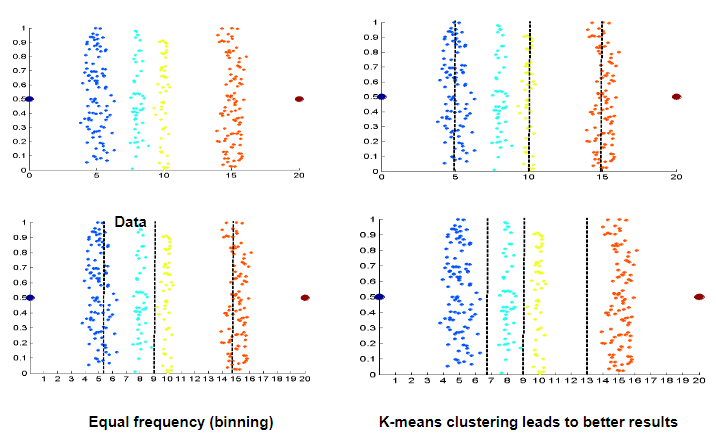

</center>

**Discretization by Classification and Correlation Analysis**



### **Summary**